In [32]:
import pandas as pd
import geopandas as gpd
from osgeo import gdal

In [33]:
my_data = pd.read_pickle("/Users/will/dev/morel-model/data/data_zcta_20230423_prism.pkl")

In [34]:
their_data = pd.read_csv("/Users/will/dev/morel-model/data/weather/2023/202304_zcta_weather_daily.csv")

In [35]:
their_data['zcta'] = their_data['zipcode'].astype(str).str.zfill(5)

In [36]:
their_data_subset = their_data[their_data['date'] == 20230423]

In [21]:
their_data_subset

,st_abb,st_code,county_name,fips,zipcode,stability,date,ppt,tmax,tmin,...,dday_a29C,dday_a30C,dday_a31C,dday_a32C,dday_a33C,dday_a34C,dday_b15C,dday_b18C,dday_b21C,zcta
22,MA,25,Hampden,25013,1001,stable,20230423,33.588,16.710,9.885,...,0.0,0.0,0.0,0.0,0.0,0.0,2.076,4.703,7.703,01001
52,MA,25,Hampshire,25015,1002,stable,20230423,25.485,15.002,7.158,...,0.0,0.0,0.0,0.0,0.0,0.0,3.920,6.920,9.920,01002
82,MA,25,Hampshire,25015,1003,stable,20230423,25.775,16.155,8.246,...,0.0,0.0,0.0,0.0,0.0,0.0,2.989,5.799,8.799,01003
112,MA,25,Worcester,25027,1005,stable,20230423,27.465,13.037,6.786,...,0.0,0.0,0.0,0.0,0.0,0.0,5.089,8.089,11.089,01005
142,MA,25,Hampshire,25015,1007,stable,20230423,21.900,15.146,7.099,...,0.0,0.0,0.0,0.0,0.0,0.0,3.886,6.878,9.878,01007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975142,WA,53,Walla Walla,53071,99363,stable,20230423,0.330,18.468,6.351,...,0.0,0.0,0.0,0.0,0.0,0.0,3.403,5.630,8.591,99363
975172,WA,53,Adams,53001,99371,stable,20230423,0.000,16.302,0.779,...,0.0,0.0,0.0,0.0,0.0,0.0,6.620,9.459,12.459,99371
975202,WA,53,Asotin,53003,99401,stable,20230423,0.583,12.849,0.718,...,0.0,0.0,0.0,0.0,0.0,0.0,8.216,11.216,14.216,99401
975232,WA,53,Asotin,53003,99402,stable,20230423,0.533,13.448,1.527,...,0.0,0.0,0.0,0.0,0.0,0.0,7.512,10.512,13.512,99402


In [25]:
my_data['zcta'] = my_data['ZCTA5CE10'].astype(str).str.zfill(5)

In [26]:
joined_data = pd.merge(my_data[['zcta', 'tmax_avg']], their_data_subset[['zcta', 'tmax']], how='inner', on=['zcta'])

In [27]:
len(their_data_subset)

32509

In [28]:
len(my_data)

33144

In [29]:
len(joined_data)

32509

In [30]:
joined_data['diff'] = joined_data['tmax'] - joined_data['tmax_avg']
joined_data['abs_diff'] = abs(joined_data['tmax'] - joined_data['tmax_avg'])

In [31]:
joined_data.describe()

,tmax_avg,tmax,diff,abs_diff
count,32509.000000,32509.000000,32509.000000,32509.000000
mean,16.032930,16.045514,0.012584,0.072181
std,7.838313,7.843216,0.138457,0.118822
min,-3.847071,-4.096000,-2.384416,0.000000
25%,9.715134,9.734000,-0.029209,0.012873
50%,15.866986,15.900000,0.000865,0.034596
75%,22.463531,22.475000,0.040572,0.081534
max,36.399422,36.424000,2.227470,2.384416


In [58]:
joined_data.sort_values(['diff'])[:40]

,zcta,tmax_avg,tmax,diff
25563,87514,8.895416,6.511,-2.384416
11968,95010,18.025064,15.801,-2.224064
17623,08740,19.950199,18.278,-1.672199
30373,92382,22.390200,20.784,-1.606200
29795,92325,23.663782,22.071,-1.592782
8454,97118,16.106249,14.561,-1.545249
29366,91739,27.244848,25.703,-1.541848
27950,94037,19.261326,17.722,-1.539326
29817,86331,21.646507,20.231,-1.415507
29728,93222,17.391201,15.983,-1.408201


In [60]:
their_data[(their_data['zcta'] == '87514') & (their_data['date'] == 20230423)]

,st_abb,st_code,county_name,fips,zipcode,stability,date,ppt,tmax,tmin,...,dday_a29C,dday_a30C,dday_a31C,dday_a32C,dday_a33C,dday_a34C,dday_b15C,dday_b18C,dday_b21C,zcta
879682,NM,35,Taos,35055,87514,stable,20230423,0.014,6.511,-5.003,...,0.0,0.0,0.0,0.0,0.0,0.0,14.246,17.246,20.246,87514


In [61]:
my_data[(my_data['zcta'] == '87514')]

,ZCTA5CE10,tmax_avg,zcta
26072,87514,8.895416,87514


In [64]:
gpd.read_file('~/Downloads/PRISM_tmin_stable_4kmM3_200904_bil/PRISM_tmin_stable_4kmM3_200904_bil.bil')

DriverError: '/Users/will/Downloads/PRISM_tmin_stable_4kmM3_200904_bil/PRISM_tmin_stable_4kmM3_200904_bil.bil' not recognized as a supported file format.

In [3]:
def ReadBilFile(bil):
    gdal.GetDriverByName('EHdr').Register()
    img = gdal.Open(bil)
    band = img.GetRasterBand(1)
    data = band.ReadAsArray()
    return data

In [10]:
x = ReadBilFile('/Users/Will/Downloads/PRISM_tmin_stable_4kmM3_200904_bil/PRISM_tmin_stable_4kmM3_200904_bil.bil')

In [15]:
x.size

872505

In [38]:
def check_and_transform_crs(zcta_gdf, raster_file):
    with rasterio.open(raster_file) as src:
        raster_crs = src.crs
        print("Raster CRS:", raster_crs)

        print("ZCTA CRS before:", zcta_gdf.crs)
        if zcta_gdf.crs != raster_crs:
            # Transform ZCTA geometries to match raster CRS
            zcta_gdf = zcta_gdf.to_crs(raster_crs)
            print("ZCTA CRS after transformation:", zcta_gdf.crs)
        else:
            print("ZCTA CRS already matches raster CRS.")

    return zcta_gdf


In [41]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt

# Load the shapefile and the raster file
zcta_shapefile = "/Users/will/dev/morel-model/data/bounds/zip_bounds_2019.shp"
raster_file = "/Users/will/dev/morel-model/data/PRISM_tmax_stable_4kmD2_20230423_asc.asc"
zcta_gdf = check_and_transform_crs(gpd.read_file(zcta_shapefile), raster_file)

Raster CRS: OGC:CRS83
ZCTA CRS before: EPSG:4269
ZCTA CRS after transformation: GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [63]:
pd.read_csv('/Users/will/dev/morel-model/data/processed_prism_data.csv')

,ZCTA5CE10,tdmean,ZCTA5CE10.1,vpdmin,ZCTA5CE10.2,vpdmax,ZCTA5CE10.3,tmin,ZCTA5CE10.4,tmax,ZCTA5CE10.5,ppt
0,35586,4.246962,35586,0.170788,35586,4.427615,35586,3.008269,35586,11.379134,35586,0.951904
1,72454,-0.818125,72454,0.144219,72454,2.917813,72454,-5.724406,72454,6.714188,72454,0.000000
2,71653,4.706115,71653,0.086759,71653,2.605655,71653,1.000747,71653,10.056275,71653,7.427265
3,19963,1.374419,19963,0.018226,19963,0.644935,19963,0.382419,19963,2.908774,19963,2.983097
4,81303,-13.291369,81303,0.121825,81303,2.801895,81303,-16.357843,81303,-0.798123,81303,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
33139,17003,-2.120684,17003,0.048526,17003,1.020053,17003,-3.850842,17003,0.136368,17003,6.978842
33140,16051,-0.858600,16051,0.211600,16051,1.452600,16051,-0.731333,16051,1.900133,16051,1.372867
33141,16066,-0.126500,16066,0.147833,16066,1.180500,16066,-0.461833,16066,2.220167,16066,2.029250
33142,44065,-1.710222,44065,0.125000,44065,1.528333,44065,-4.644111,44065,1.227889,44065,1.280667


In [42]:
with rasterio.open(raster_file) as src:
    raster_crs = src.crs
    raster_bounds = src.bounds
    raster_res = src.res  # Spatial resolution

In [43]:
# Check if CRS matches
if zcta_gdf.crs != raster_crs:
    print("CRS mismatch")
else:
    print("CRS matches")

CRS matches


In [44]:
# Compare extents and bounds
zcta_bounds = zcta_gdf.total_bounds
print("Shapefile bounds:", zcta_bounds)
print("Raster bounds:", raster_bounds)

Shapefile bounds: [-176.684712  -14.37374   145.830418   71.341324]
Raster bounds: BoundingBox(left=-125.020833333333, bottom=24.062499999792998, right=-66.479166666198, top=49.9375)


In [52]:
from rasterio.plot import show

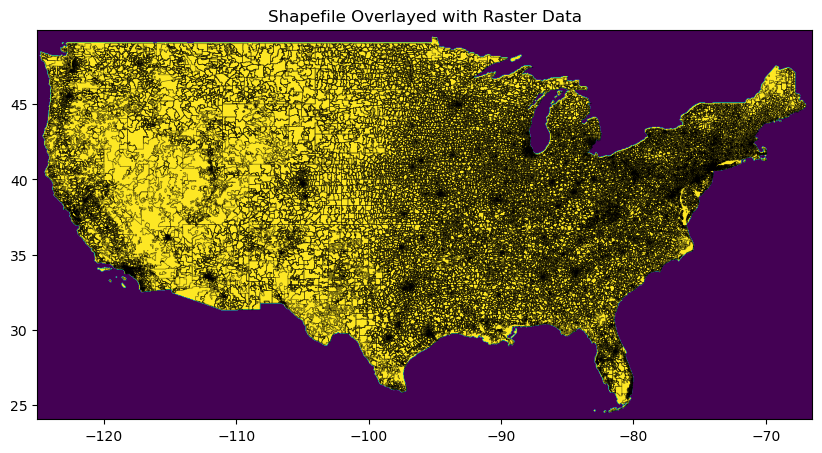

In [55]:
common_extent = [
    raster_bounds.left,
    raster_bounds.right,
    raster_bounds.bottom,
    raster_bounds.top
]

if zcta_gdf.crs != raster_crs:
    zcta_gdf = zcta_gdf.to_crs(raster_crs)

# Plot both the shapefile and raster on the same plot
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figure size as needed

# Plot the raster data
show(raster_data, ax=ax, transform=src.transform, cmap="viridis", alpha=1.0)  # Use alpha for transparency

# Plot the shapefile with edge color and adjust extent to match raster bounds
zcta_gdf.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.5, facecolor='none')  # Plot with transparency and no fill
ax.set_xlim([raster_bounds.left, raster_bounds.right])  # Set x-axis limits
ax.set_ylim([raster_bounds.bottom, raster_bounds.top])  # Set y-axis limits
ax.set_title("Shapefile Overlayed with Raster Data")

plt.show()

In [56]:
import datetime

In [58]:
end_date = datetime.datetime(2010, 1, 2)

In [62]:
f"{end_date.year}{str(end_date.month).zfill(2)}{str(end_date.day).zfill(2)}"

'20100102'